# Import and preprocess

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df = pd.read_csv('/content/drive/MyDrive/Advanced AI/mortgage.csv')

In [51]:
df

,Unnamed: 0,V1,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C,MI_TYPE,RELOCATION_FLG,Monthly.Rpt.Prd,Servicer.Name,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Maturity.Date,MSA,Delq.Status,MOD_FLAG,Zero.Bal.Code,ZB_DTE,...,modfg_cost,C_modir_cost,C_modfb_cost,Count,LAST_STAT,lpi2disp,zb2disp,INT_COST,total_expense,total_proceeds,NET_LOSS,NET_SEV,Total_Cost,Tot_Procs,Tot_Liq_Ex,LAST_DTE,FMOD_DTE,FMOD_UPB,FCE_DTE,FCE_UPB,F180_DTE,F180_UPB,VinYr,ActYr,DispYr,MODIR_COST,MODFB_COST,MODTOT_COST,date,n,n.obs,year,n.year,n.year.max,def.0,def.1,def.2,def.3,def.4,def.5
0,1,154069,420609590121,R,OTHER,2.875,450000.0,180,08/2016,11/2016,19,19,1.0,28.0,802.0,N,R,SF,1,P,CA,943,NaN,FRM,NaN,NaN,N,2016-12-01,NaN,2.875,NaN,2,178,175,10/2031,41940,0,N,NaN,NaN,...,0.0,0.0,0.0,4.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,4.0,13.0,2016.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2682459,846895888381,R,OTHER,5.500,30000.0,120,08/2003,10/2003,13,13,2.0,11.0,758.0,N,P,SF,1,P,MD,207,NaN,FRM,785.0,NaN,N,2003-12-01,NaN,5.500,NaN,3,117,101,09/2013,12580,0,N,NaN,NaN,...,0.0,0.0,0.0,3.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,2003.0,NO DISP_DT,0.0,0.0,0.0,2003-12-01,3.0,22.0,2003.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,247415,610668057421,C,OTHER,3.875,115000.0,360,02/2016,04/2016,85,85,1.0,31.0,751.0,Y,P,SF,1,P,KS,662,12.0,FRM,NaN,1.0,N,2016-12-01,NaN,3.875,113208.71,9,351,351,03/2046,28140,0,N,NaN,NaN,...,0.0,0.0,0.0,9.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,9.0,18.0,2016.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,381502,244371124021,R,OTHER,5.750,88000.0,360,03/2004,05/2004,90,90,2.0,26.0,773.0,N,P,SF,1,I,TX,781,25.0,FRM,762.0,1.0,N,2004-12-01,NaN,5.750,86979.02,8,352,352,04/2034,41700,0,N,NaN,NaN,...,0.0,0.0,0.0,9.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,2004.0,NO DISP_DT,0.0,0.0,0.0,2004-12-01,9.0,106.0,2004.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3543,107428173821,R,OTHER,3.500,290000.0,360,07/2016,09/2016,90,90,1.0,45.0,792.0,Y,P,SF,1,P,MA,26,25.0,FRM,NaN,1.0,N,2016-12-01,NaN,3.500,NaN,4,356,354,08/2046,12700,0,N,NaN,NaN,...,0.0,0.0,0.0,5.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,5.0,14.0,2016.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99579,99580,1210858,867754609361,R,OTHER,5.000,84000.0,360,09/2011,11/2011,80,80,2.0,29.0,709.0,N,C,SF,1,P,IL,618,NaN,FRM,705.0,NaN,N,2011-12-01,NaN,5.000,NaN,2,358,358,10/2041,16580,0,N,NaN,NaN,...,0.0,0.0,0.0,3.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,2011.0,NO DISP_DT,0.0,0.0,0.0,2011-12-01,3.0,5.0,2011.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
99580,99581,552637,337153122561,B,OTHER,6.750,109000.0,180,01/2002,03/2002,30,30,2.0,36.0,674.0,N,C,SF,1,P,CA,923,NaN,FRM,NaN,NaN,N,2002-12-01,NaN,6.750,105008.57,10,170,170,02/2017,40140,0,N,NaN,NaN,...,0.0,0.0,0.0,11.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2002.0,2002.0,NO DISP_DT,0.0,0.0,0.0,2002-12-01,11.0,20.0,2002.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
99581,99582,655333,478527357301,R,OTHER,3.625,239000.0,360,04/2013,06/2013,71,71,1.0,24.0,709.0,N,R,SF,1,P,NJ,76,NaN,FRM,NaN,NaN,N,2013-12-01,NaN,3.625,230937.71,7,353,339,05/2043,35620,0,N,NaN,NaN,...,0.0,0.0,0.0,8.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [52]:
df.dtypes.value_counts()

float64    63
object     25
int64      13
dtype: int64

In [53]:
#check if there is duplicated loan
df['LOAN_ID'].is_unique

True

In [54]:
df.columns[df.isnull().any()]

Index(['NUM_BO', 'DTI', 'CSCORE_B', 'MI_PCT', 'CSCORE_C', 'MI_TYPE',
       'Servicer.Name', 'LAST_UPB', 'Zero.Bal.Code', 'ZB_DTE', 'LPI_DTE',
       'FCC_DTE', 'DISP_DT', 'FCC_COST', 'PP_COST', 'AR_COST', 'IE_COST',
       'TAX_COST', 'NS_PROCS', 'CE_PROCS', 'RMW_PROCS', 'O_PROCS',
       'NON_INT_UPB', 'REPCH_FLAG', 'TRANSFER_FLAG', 'CSCORE_MN', 'ORIG_VAL',
       'PRIN_FORG_UPB', 'MODTRM_CHNG', 'MODUPB_CHNG', 'Fin_UPB', 'modfg_cost',
       'C_modir_cost', 'C_modfb_cost', 'Count', 'LAST_STAT', 'lpi2disp',
       'zb2disp', 'INT_COST', 'total_expense', 'total_proceeds', 'NET_LOSS',
       'NET_SEV', 'Total_Cost', 'Tot_Procs', 'Tot_Liq_Ex', 'LAST_DTE',
       'FMOD_DTE', 'FMOD_UPB', 'FCE_DTE', 'FCE_UPB', 'F180_DTE', 'F180_UPB',
       'VinYr', 'ActYr', 'DispYr', 'MODIR_COST', 'MODFB_COST', 'MODTOT_COST',
       'date', 'n', 'n.obs', 'year', 'n.year', 'n.year.max', 'def.0', 'def.1',
       'def.2', 'def.3', 'def.4', 'def.5'],
      dtype='object')

In [55]:
for column in df:
  num = len(df) - df[column].count()
  print(column +" has " + str(num)+ " null values")

Unnamed: 0 has 0 null values
V1 has 0 null values
LOAN_ID has 0 null values
ORIG_CHN has 0 null values
Seller.Name has 0 null values
ORIG_RT has 0 null values
ORIG_AMT has 0 null values
ORIG_TRM has 0 null values
ORIG_DTE has 0 null values
FRST_DTE has 0 null values
OLTV has 0 null values
OCLTV has 0 null values
NUM_BO has 15 null values
DTI has 1313 null values
CSCORE_B has 423 null values
FTHB_FLG has 0 null values
PURPOSE has 0 null values
PROP_TYP has 0 null values
NUM_UNIT has 0 null values
OCC_STAT has 0 null values
STATE has 0 null values
ZIP_3 has 0 null values
MI_PCT has 80357 null values
Product.Type has 0 null values
CSCORE_C has 42774 null values
MI_TYPE has 80357 null values
RELOCATION_FLG has 0 null values
Monthly.Rpt.Prd has 0 null values
Servicer.Name has 84236 null values
LAST_RT has 0 null values
LAST_UPB has 56081 null values
Loan.Age has 0 null values
Months.To.Legal.Mat has 0 null values
Adj.Month.To.Mat has 0 null values
Maturity.Date has 0 null values
MSA has 0 n

In [56]:
df = df.drop(columns=['FMOD_DTE','FMOD_UPB','FCE_DTE','FCE_UPB','F180_DTE','F180_UPB','PRIN_FORG_UPB','FCC_DTE','ZB_DTE', 'LPI_DTE',
       'RMW_PROCS','DISP_DT','FCC_COST','PP_COST','AR_COST','IE_COST','TAX_COST','NS_PROCS','CE_PROCS','O_PROCS','NON_INT_UPB'],axis=1)

In [57]:
df['REPCH_FLAG'] = df['REPCH_FLAG'].fillna('Y')
df['TRANSFER_FLAG'] = df['TRANSFER_FLAG'].fillna('Y')

In [58]:
#Change the vairable to binary vairbale
df['CSCORE_CB'] = np.where(df['CSCORE_C'].isnull(),0,1)
df = df.drop(['CSCORE_C'],axis=1)

In [59]:
#Zero Balance
df['Zero.Bal.Code'] = np.where(df['Zero.Bal.Code'].isnull(),0,1)

In [60]:
#Mortgage insurance percentage
df['MI_PCT'] = df['MI_PCT'].fillna(0)

In [61]:
df = df.drop(columns=['MI_TYPE','Servicer.Name'],axis=1)

In [62]:
#NUM_BO Fill na with mode   
#DTI fill na with mean
#LAST_UPB fill na with 0 
df['NUM_BO'] = df['NUM_BO'].fillna(df['NUM_BO'].mode()[0])
df['DTI'] = df['DTI'].fillna(df['DTI'].mean())
df['LAST_UPB'] = df['LAST_UPB'].fillna(0)

In [63]:
for column in df:
  num = len(df) - df[column].count()
  print(column +" has " + str(num)+ " null values")

Unnamed: 0 has 0 null values
V1 has 0 null values
LOAN_ID has 0 null values
ORIG_CHN has 0 null values
Seller.Name has 0 null values
ORIG_RT has 0 null values
ORIG_AMT has 0 null values
ORIG_TRM has 0 null values
ORIG_DTE has 0 null values
FRST_DTE has 0 null values
OLTV has 0 null values
OCLTV has 0 null values
NUM_BO has 0 null values
DTI has 0 null values
CSCORE_B has 423 null values
FTHB_FLG has 0 null values
PURPOSE has 0 null values
PROP_TYP has 0 null values
NUM_UNIT has 0 null values
OCC_STAT has 0 null values
STATE has 0 null values
ZIP_3 has 0 null values
MI_PCT has 0 null values
Product.Type has 0 null values
RELOCATION_FLG has 0 null values
Monthly.Rpt.Prd has 0 null values
LAST_RT has 0 null values
LAST_UPB has 0 null values
Loan.Age has 0 null values
Months.To.Legal.Mat has 0 null values
Adj.Month.To.Mat has 0 null values
Maturity.Date has 0 null values
MSA has 0 null values
Delq.Status has 0 null values
MOD_FLAG has 0 null values
Zero.Bal.Code has 0 null values
REPCH_FLA

In [64]:
df

,Unnamed: 0,V1,LOAN_ID,ORIG_CHN,Seller.Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,RELOCATION_FLG,Monthly.Rpt.Prd,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Maturity.Date,MSA,Delq.Status,MOD_FLAG,Zero.Bal.Code,REPCH_FLAG,TRANSFER_FLAG,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,modfg_cost,C_modir_cost,C_modfb_cost,Count,LAST_STAT,lpi2disp,zb2disp,INT_COST,total_expense,total_proceeds,NET_LOSS,NET_SEV,Total_Cost,Tot_Procs,Tot_Liq_Ex,LAST_DTE,VinYr,ActYr,DispYr,MODIR_COST,MODFB_COST,MODTOT_COST,date,n,n.obs,year,n.year,n.year.max,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
0,1,154069,420609590121,R,OTHER,2.875,450000.0,180,08/2016,11/2016,19,19,1.0,28.0,802.0,N,R,SF,1,P,CA,943,0.0,FRM,N,2016-12-01,2.875,0.00,2,178,175,10/2031,41940,0,N,0,Y,N,802.0,2.368421e+06,0.0,0.0,0.00,0.0,0.0,0.0,4.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,4.0,13.0,2016.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,2682459,846895888381,R,OTHER,5.500,30000.0,120,08/2003,10/2003,13,13,2.0,11.0,758.0,N,P,SF,1,P,MD,207,0.0,FRM,N,2003-12-01,5.500,0.00,3,117,101,09/2013,12580,0,N,0,Y,Y,758.0,2.307692e+05,0.0,0.0,0.00,0.0,0.0,0.0,3.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003-12-01,2003.0,2003.0,NO DISP_DT,0.0,0.0,0.0,2003-12-01,3.0,22.0,2003.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,247415,610668057421,C,OTHER,3.875,115000.0,360,02/2016,04/2016,85,85,1.0,31.0,751.0,Y,P,SF,1,P,KS,662,12.0,FRM,N,2016-12-01,3.875,113208.71,9,351,351,03/2046,28140,0,N,0,Y,N,751.0,1.352941e+05,0.0,0.0,113208.71,0.0,0.0,0.0,9.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,9.0,18.0,2016.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,381502,244371124021,R,OTHER,5.750,88000.0,360,03/2004,05/2004,90,90,2.0,26.0,773.0,N,P,SF,1,I,TX,781,25.0,FRM,N,2004-12-01,5.750,86979.02,8,352,352,04/2034,41700,0,N,0,Y,Y,762.0,9.777778e+04,0.0,0.0,86979.02,0.0,0.0,0.0,9.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004-12-01,2004.0,2004.0,NO DISP_DT,0.0,0.0,0.0,2004-12-01,9.0,106.0,2004.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5,3543,107428173821,R,OTHER,3.500,290000.0,360,07/2016,09/2016,90,90,1.0,45.0,792.0,Y,P,SF,1,P,MA,26,25.0,FRM,N,2016-12-01,3.500,0.00,4,356,354,08/2046,12700,0,N,0,Y,N,792.0,3.222222e+05,0.0,0.0,0.00,0.0,0.0,0.0,5.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-01,2016.0,2016.0,NO DISP_DT,0.0,0.0,0.0,2016-12-01,5.0,14.0,2016.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99579,99580,1210858,867754609361,R,OTHER,5.000,84000.0,360,09/2011,11/2011,80,80,2.0,29.0,709.0,N,C,SF,1,P,IL,618,0.0,FRM,N,2011-12-01,5.000,0.00,2,358,358,10/2041,16580,0,N,0,Y,N,705.0,1.050000e+05,0.0,0.0,0.00,0.0,0.0,0.0,3.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-12-01,2011.0,2011.0,NO DISP_DT,0.0,0.0,0.0,2011-12-01,3.0,5.0,2011.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99580,99581,552637,337153122561,B,OTHER,6.750,109000.0,180,01/2002,03/2002,30,30,2.0,36.0,674.0,N,C,SF,1,P,CA,923,0.0,FRM,N,2002-12-01,6.750,105008.57,10,170,170,02/2017,40140,0,N,0,Y,Y,674.0,3.633333e+05,0.0,0.0,105008.57,0.0,0.0,0.0,11.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002-12-01,2002.0,2002.0,NO DISP_DT,0.0,0.0,0.0,2002-12-01,11.0,20.0,2002.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99581,99582,655333,478527357301,R,OTHER,3.625,239000.0,360,04/2013,06/2013,71,71,1.0,24.0,709.0,N,R,SF,1,P,NJ,76,0.0,FRM,N,2013-12-01,3.625,230937.71,7,353,339,05/2043,35620,0,N,0,Y,N,709.0,3.366197e+05,0.0,0.0,230937.71,0.0,0.0,0.0,8.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-12-01,2013.0,2013.0,NO DISP_DT,0.0,0

In [65]:
df.columns

Index(['Unnamed: 0', 'V1', 'LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT',
       'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG', 'PURPOSE', 'PROP_TYP',
       'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3', 'MI_PCT', 'Product.Type',
       'RELOCATION_FLG', 'Monthly.Rpt.Prd', 'LAST_RT', 'LAST_UPB', 'Loan.Age',
       'Months.To.Legal.Mat', 'Adj.Month.To.Mat', 'Maturity.Date', 'MSA',
       'Delq.Status', 'MOD_FLAG', 'Zero.Bal.Code', 'REPCH_FLAG',
       'TRANSFER_FLAG', 'CSCORE_MN', 'ORIG_VAL', 'MODTRM_CHNG', 'MODUPB_CHNG',
       'Fin_UPB', 'modfg_cost', 'C_modir_cost', 'C_modfb_cost', 'Count',
       'LAST_STAT', 'lpi2disp', 'zb2disp', 'INT_COST', 'total_expense',
       'total_proceeds', 'NET_LOSS', 'NET_SEV', 'Total_Cost', 'Tot_Procs',
       'Tot_Liq_Ex', 'LAST_DTE', 'VinYr', 'ActYr', 'DispYr', 'MODIR_COST',
       'MODFB_COST', 'MODTOT_COST', 'date', 'n', 'n.obs', 'year', 'n.year',
       'n.year.max', 'def.0', 'def.1',

In [66]:
# check numerical columns
df.describe()

,Unnamed: 0,V1,LOAN_ID,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,ZIP_3,MI_PCT,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,MSA,Delq.Status,Zero.Bal.Code,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,modfg_cost,C_modir_cost,C_modfb_cost,Count,lpi2disp,zb2disp,INT_COST,total_expense,total_proceeds,NET_LOSS,NET_SEV,Total_Cost,Tot_Procs,Tot_Liq_Ex,VinYr,ActYr,MODIR_COST,MODFB_COST,MODTOT_COST,n,n.obs,year,n.year,n.year.max,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
count,99584.000000,9.958400e+04,9.958400e+04,99584.000000,9.958400e+04,99584.000000,99584.000000,99584.000000,99584.000000,99584.000000,99161.000000,99584.000000,99584.000000,99584.000000,99584.000000,9.958400e+04,99584.000000,99584.000000,99584.000000,99584.000000,99584.000000,99584.000000,99327.000000,9.958300e+04,99583.000000,99583.000000,9.958300e+04,99583.0,99583.0,99583.0,99583.000000,99583.0,99583.0,99583.0,99583.0,99583.0,99583.0,99583.0,99583.0,99583.0,99583.0,99583.000000,99583.000000,99583.0,99583.0,99583.0,99583.000000,99583.000000,99583.000000,99583.000000,99583.000000,99583.000000,99577.000000,99567.000000,99551.000000,99524.000000,99495.000000,99584.000000
mean,49792.500000,8.822492e+05,5.499186e+11,4.917546,1.810787e+05,302.329360,70.425982,71.282686,1.596582,32.708042,748.469076,1.034955,538.791221,4.640444,4.917550,7.728516e+04,4.750311,297.579049,287.572632,26072.587765,26.953416,0.026972,742.089724,2.755260e+05,0.006095,0.006839,7.728594e+04,0.0,0.0,0.0,5.780796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.956017,2008.956017,0.0,0.0,0.0,5.780796,47.531095,2008.956017,5.780796,5.780796,0.000110,0.001426,0.003716,0.006921,0.010148,0.013870,0.570473
std,28747.568941,1.087200e+06,2.593320e+11,1.296986,1.066780e+05,84.678421,17.728665,17.711664,0.503835,11.095983,51.360869,0.245815,293.145422,10.012709,1.296995,1.119822e+05,3.119108,84.714626,96.938545,14662.685064,161.839672,0.162003,52.453780,1.979338e+05,0.077835,0.082412,1.119825e+05,0.0,0.0,0.0,3.112890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.307667,5.307667,0.0,0.0,0.0,3.112890,37.423689,5.307667,3.112890,3.112890,0.010509,0.037736,0.060847,0.082905,0.100227,0.116952,0.495011
min,1.000000,0.000000e+00,1.000228e+11,2.125000,9.000000e+03,60.000000,5.000000,5.000000,1.000000,1.000000,422.000000,1.000000,0.000000,0.000000,2.125000,0.000000e+00,-1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,372.000000,1.157895e+04,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.000000,2000.000000,0.0,0.0,0.0,1.000000,2.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24896.750000,2.439225e+05,3.268169e+11,3.875000,1.010000e+05,180.000000,60.000000,61.000000,1.000000,25.000000,716.000000,1.000000,303.000000,0.000000,3.875000,0.000000e+00,2.000000,180.000000,178.000000,15540.000000,0.000000,0.000000,708.000000,1.482556e+05,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003.000000,2003.000000,0.0,0.0,0.0,3.000000,19.000000,2003.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49792.500000,5.219085e+05,5.488589e+11,4.750000,1.550000e+05,360.000000,75.000000,75.000000,2.000000,33.000000,761.000000,1.000000,537.000000,0.000000,4.750000,0.000000e+00,5.000000,353.000000,352.000000,29100.000000,0.000000,0.000000,753.000000,2.252632e+05,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.000000,2010.000000,0.0,0.0,0.0,6.000000,37.000000,2010.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,74688.250000,1.107556e+06,7.747007e+11,5.875000,2.380000e+05,360.000000,80.000000,80.000000,2.000000,41.000000,789.000000,1.000000,801.000000,0.000000,5.875000,1.344370e+05,7.000000,357.000000,356.000000,38660.000000,0.000000,0.000000,784.000000,3.460000e+05,0.000000,0.000000,1.344386e+05,0.0,0.0,0.0,8.000000,

In [67]:
# check categorical columns
df[df.select_dtypes('object').columns].apply(lambda x: x.unique())

ORIG_CHN                                                   [R, C, B]
Seller.Name                                                  [OTHER]
ORIG_DTE           [08/2016, 08/2003, 02/2016, 03/2004, 07/2016, ...
FRST_DTE           [11/2016, 10/2003, 04/2016, 05/2004, 09/2016, ...
FTHB_FLG                                                   [N, Y, U]
PURPOSE                                                 [R, P, C, U]
PROP_TYP                                        [SF, PU, CO, CP, MH]
OCC_STAT                                                   [P, I, S]
STATE              [CA, MD, KS, TX, MA, LA, IL, VA, MI, TN, MO, A...
Product.Type                                                   [FRM]
RELOCATION_FLG                                                [N, Y]
Monthly.Rpt.Prd    [2016-12-01, 2003-12-01, 2004-12-01, 2013-12-0...
Maturity.Date      [10/2031, 09/2013, 03/2046, 04/2034, 08/2046, ...
MOD_FLAG                                                         [N]
REPCH_FLAG                        

In [68]:
drop = ['Unnamed: 0','V1','LOAN_ID','ZIP_3','MSA', # meaningless ID or Code
        'ORIG_DTE','FRST_DTE','Monthly.Rpt.Prd','Maturity.Date','LAST_DTE', # useless date
        'modfg_cost', 'C_modir_cost', 'C_modfb_cost', 'Count','lpi2disp', 'zb2disp', # every row is 0
        'INT_COST', 'total_expense','total_proceeds', 'NET_LOSS', 'NET_SEV', # every row is 0
        'Total_Cost', 'Tot_Procs','Tot_Liq_Ex','MODFB_COST','MODTOT_COST','MODIR_COST', # every row is 0
        'Product.Type','Seller.Name','MOD_FLAG','DispYr', # every row is the same
        'ActYr','date', 'n', 'n.obs', 'year', 'n.year', 'n.year.max' # repeating columns
        ]
df = df.drop(columns=drop,axis=1)

In [69]:
df.describe()

,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,MI_PCT,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,Zero.Bal.Code,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,VinYr,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
count,99584.000000,9.958400e+04,99584.000000,99584.000000,99584.000000,99584.000000,99584.000000,99161.000000,99584.000000,99584.000000,99584.000000,9.958400e+04,99584.000000,99584.000000,99584.000000,99584.000000,99584.000000,99327.000000,9.958300e+04,99583.000000,99583.000000,9.958300e+04,99583.000000,99583.000000,99577.000000,99567.000000,99551.000000,99524.000000,99495.000000,99584.000000
mean,4.917546,1.810787e+05,302.329360,70.425982,71.282686,1.596582,32.708042,748.469076,1.034955,4.640444,4.917550,7.728516e+04,4.750311,297.579049,287.572632,26.953416,0.026972,742.089724,2.755260e+05,0.006095,0.006839,7.728594e+04,2008.956017,0.000110,0.001426,0.003716,0.006921,0.010148,0.013870,0.570473
std,1.296986,1.066780e+05,84.678421,17.728665,17.711664,0.503835,11.095983,51.360869,0.245815,10.012709,1.296995,1.119822e+05,3.119108,84.714626,96.938545,161.839672,0.162003,52.453780,1.979338e+05,0.077835,0.082412,1.119825e+05,5.307667,0.010509,0.037736,0.060847,0.082905,0.100227,0.116952,0.495011
min,2.125000,9.000000e+03,60.000000,5.000000,5.000000,1.000000,1.000000,422.000000,1.000000,0.000000,2.125000,0.000000e+00,-1.000000,57.000000,0.000000,0.000000,0.000000,372.000000,1.157895e+04,0.000000,0.000000,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.875000,1.010000e+05,180.000000,60.000000,61.000000,1.000000,25.000000,716.000000,1.000000,0.000000,3.875000,0.000000e+00,2.000000,180.000000,178.000000,0.000000,0.000000,708.000000,1.482556e+05,0.000000,0.000000,0.000000e+00,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.750000,1.550000e+05,360.000000,75.000000,75.000000,2.000000,33.000000,761.000000,1.000000,0.000000,4.750000,0.000000e+00,5.000000,353.000000,352.000000,0.000000,0.000000,753.000000,2.252632e+05,0.000000,0.000000,0.000000e+00,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875000,2.380000e+05,360.000000,80.000000,80.000000,2.000000,41.000000,789.000000,1.000000,0.000000,5.875000,1.344370e+05,7.000000,357.000000,356.000000,0.000000,0.000000,784.000000,3.460000e+05,0.000000,0.000000,1.344386e+05,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.125000,1.039000e+06,360.000000,97.000000,134.000000,6.000000,64.000000,850.000000,4.000000,50.000000,12.125000,1.023598e+06,12.000000,361.000000,360.000000,999.000000,1.000000,850.000000,4.375000e+06,1.000000,1.000000,1.023598e+06,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df['FTHB_FLG'].value_counts()

N    87877
Y    11669
U       38
Name: FTHB_FLG, dtype: int64

In [71]:
df['PURPOSE'].value_counts()

P    37410
R    33426
C    28721
U       27
Name: PURPOSE, dtype: int64

In [72]:
df['Delq.Status'].value_counts() # 999 means 'Unknown'

0      96286
999     2686
1        508
2         58
3         21
6         11
4          8
5          6
Name: Delq.Status, dtype: int64

In [73]:
df = df[(df['FTHB_FLG']!='U')&(df['PURPOSE']!='U')&(df['Delq.Status']!=999)]

In [74]:
# rows with null values are very few and can be deleted
df = df.dropna()

In [75]:
# from N/Y to 0/1
df['FTHB_FLG'] = np.where(df['FTHB_FLG']=='N',0,1)
df['RELOCATION_FLG'] = np.where(df['RELOCATION_FLG']=='N',0,1)
df['REPCH_FLAG'] = np.where(df['REPCH_FLAG']=='N',0,1)
df['TRANSFER_FLAG'] = np.where(df['TRANSFER_FLAG']=='N',0,1)

In [76]:
df.describe()

,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,NUM_UNIT,MI_PCT,RELOCATION_FLG,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,Zero.Bal.Code,REPCH_FLAG,TRANSFER_FLAG,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,VinYr,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
count,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.0,96352.0,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000
mean,4.889319,1.806442e+05,302.088177,70.476285,71.333527,1.595556,32.693024,748.590906,0.118378,1.035069,4.663245,0.001235,4.889322,7.391758e+04,4.744032,297.344144,295.504577,0.008199,0.0,1.0,0.386520,742.217857,2.744621e+05,0.006238,0.006985,7.391758e+04,2009.049247,0.000114,0.001401,0.003705,0.006902,0.010088,0.013752,0.570440
std,1.285405,1.063913e+05,84.793035,17.720555,17.704839,0.504139,11.079481,51.282469,0.323057,0.246036,10.032640,0.035122,1.285412,1.099450e+05,3.135524,84.830010,85.471625,0.126159,0.0,0.0,0.486955,52.380069,1.966694e+05,0.078732,0.083283,1.099450e+05,5.284733,0.010684,0.037405,0.060758,0.082790,0.099932,0.116459,0.495016
min,2.125000,1.000000e+04,60.000000,5.000000,5.000000,1.000000,1.000000,422.000000,0.000000,1.000000,0.000000,0.000000,2.125000,0.000000e+00,-1.000000,57.000000,6.000000,0.000000,0.0,1.0,0.000000,372.000000,1.157895e+04,0.000000,0.000000,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.875000,1.000000e+05,180.000000,60.000000,61.000000,1.000000,25.000000,716.000000,0.000000,1.000000,0.000000,0.000000,3.875000,0.000000e+00,2.000000,180.000000,179.000000,0.000000,0.0,1.0,0.000000,708.000000,1.477778e+05,0.000000,0.000000,0.000000e+00,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.625000,1.540000e+05,360.000000,75.000000,75.000000,2.000000,33.000000,761.000000,0.000000,1.000000,0.000000,0.000000,4.625000,0.000000e+00,5.000000,353.000000,352.000000,0.000000,0.0,1.0,0.000000,754.000000,2.250000e+05,0.000000,0.000000,0.000000e+00,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875000,2.370000e+05,360.000000,80.000000,80.000000,2.000000,41.000000,790.000000,0.000000,1.000000,0.000000,0.000000,5.875000,1.285727e+05,7.000000,357.000000,356.000000,0.000000,0.0,1.0,1.000000,784.000000,3.448276e+05,0.000000,0.000000,1.285727e+05,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.125000,1.039000e+06,360.000000,97.000000,134.000000,6.000000,64.000000,850.000000,1.000000,4.000000,50.000000,1.000000,12.125000,1.023598e+06,12.000000,361.000000,360.000000,6.000000,0.0,1.0,1.000000,850.000000,4.375000e+06,1.000000,1.000000,1.023598e+06,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df['Zero.Bal.Code'].value_counts()

0    96352
Name: Zero.Bal.Code, dtype: int64

In [78]:
df['REPCH_FLAG'].value_counts()

1    96352
Name: REPCH_FLAG, dtype: int64

About Delq.Status and LAST_STAT. They are the same.

In [79]:
df['Delq.Status'].value_counts()

0    95755
1      498
2       55
3       21
6       11
4        7
5        5
Name: Delq.Status, dtype: int64

In [80]:
df['LAST_STAT'].value_counts()

C    95755
1      498
2       55
3       21
6       11
4        7
5        5
Name: LAST_STAT, dtype: int64

In [81]:
df = df.drop(['Zero.Bal.Code','REPCH_FLAG','LAST_STAT'],axis=1)

In [82]:
df.shape

(96352, 37)

In [83]:
# df.to_excel('/content/drive/MyDrive/Advanced AI/data.xlsx')

In [84]:
df['Delq.Status'].value_counts()

0    95755
1      498
2       55
3       21
6       11
4        7
5        5
Name: Delq.Status, dtype: int64

# EDA

In [85]:
df.head()

,ORIG_CHN,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,MI_PCT,RELOCATION_FLG,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,TRANSFER_FLAG,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,VinYr,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
0,R,2.875,450000.0,180,19,19,1.0,28.0,802.0,0,R,SF,1,P,CA,0.0,0,2.875,0.00,2,178,175,0,0,802.0,2.368421e+06,0.0,0.0,0.00,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,R,5.500,30000.0,120,13,13,2.0,11.0,758.0,0,P,SF,1,P,MD,0.0,0,5.500,0.00,3,117,101,0,1,758.0,2.307692e+05,0.0,0.0,0.00,2003.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,C,3.875,115000.0,360,85,85,1.0,31.0,751.0,1,P,SF,1,P,KS,12.0,0,3.875,113208.71,9,351,351,0,0,751.0,1.352941e+05,0.0,0.0,113208.71,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,R,5.750,88000.0,360,90,90,2.0,26.0,773.0,0,P,SF,1,I,TX,25.0,0,5.750,86979.02,8,352,352,0,1,762.0,9.777778e+04,0.0,0.0,86979.02,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,R,3.500,290000.0,360,90,90,1.0,45.0,792.0,1,P,SF,1,P,MA,25.0,0,3.500,0.00,4,356,354,0,0,792.0,3.222222e+05,0.0,0.0,0.00,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [86]:
df.describe()

,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,NUM_UNIT,MI_PCT,RELOCATION_FLG,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,TRANSFER_FLAG,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,VinYr,def.0,def.1,def.2,def.3,def.4,def.5,CSCORE_CB
count,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,9.635200e+04,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000,96352.000000
mean,4.889319,1.806442e+05,302.088177,70.476285,71.333527,1.595556,32.693024,748.590906,0.118378,1.035069,4.663245,0.001235,4.889322,7.391758e+04,4.744032,297.344144,295.504577,0.008199,0.386520,742.217857,2.744621e+05,0.006238,0.006985,7.391758e+04,2009.049247,0.000114,0.001401,0.003705,0.006902,0.010088,0.013752,0.570440
std,1.285405,1.063913e+05,84.793035,17.720555,17.704839,0.504139,11.079481,51.282469,0.323057,0.246036,10.032640,0.035122,1.285412,1.099450e+05,3.135524,84.830010,85.471625,0.126159,0.486955,52.380069,1.966694e+05,0.078732,0.083283,1.099450e+05,5.284733,0.010684,0.037405,0.060758,0.082790,0.099932,0.116459,0.495016
min,2.125000,1.000000e+04,60.000000,5.000000,5.000000,1.000000,1.000000,422.000000,0.000000,1.000000,0.000000,0.000000,2.125000,0.000000e+00,-1.000000,57.000000,6.000000,0.000000,0.000000,372.000000,1.157895e+04,0.000000,0.000000,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.875000,1.000000e+05,180.000000,60.000000,61.000000,1.000000,25.000000,716.000000,0.000000,1.000000,0.000000,0.000000,3.875000,0.000000e+00,2.000000,180.000000,179.000000,0.000000,0.000000,708.000000,1.477778e+05,0.000000,0.000000,0.000000e+00,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.625000,1.540000e+05,360.000000,75.000000,75.000000,2.000000,33.000000,761.000000,0.000000,1.000000,0.000000,0.000000,4.625000,0.000000e+00,5.000000,353.000000,352.000000,0.000000,0.000000,754.000000,2.250000e+05,0.000000,0.000000,0.000000e+00,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875000,2.370000e+05,360.000000,80.000000,80.000000,2.000000,41.000000,790.000000,0.000000,1.000000,0.000000,0.000000,5.875000,1.285727e+05,7.000000,357.000000,356.000000,0.000000,1.000000,784.000000,3.448276e+05,0.000000,0.000000,1.285727e+05,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.125000,1.039000e+06,360.000000,97.000000,134.000000,6.000000,64.000000,850.000000,1.000000,4.000000,50.000000,1.000000,12.125000,1.023598e+06,12.000000,361.000000,360.000000,6.000000,1.000000,850.000000,4.375000e+06,1.000000,1.000000,1.023598e+06,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
df.columns

Index(['ORIG_CHN', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'OLTV', 'OCLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG', 'PURPOSE', 'PROP_TYP',
       'NUM_UNIT', 'OCC_STAT', 'STATE', 'MI_PCT', 'RELOCATION_FLG', 'LAST_RT',
       'LAST_UPB', 'Loan.Age', 'Months.To.Legal.Mat', 'Adj.Month.To.Mat',
       'Delq.Status', 'TRANSFER_FLAG', 'CSCORE_MN', 'ORIG_VAL', 'MODTRM_CHNG',
       'MODUPB_CHNG', 'Fin_UPB', 'VinYr', 'def.0', 'def.1', 'def.2', 'def.3',
       'def.4', 'def.5', 'CSCORE_CB'],
      dtype='object')

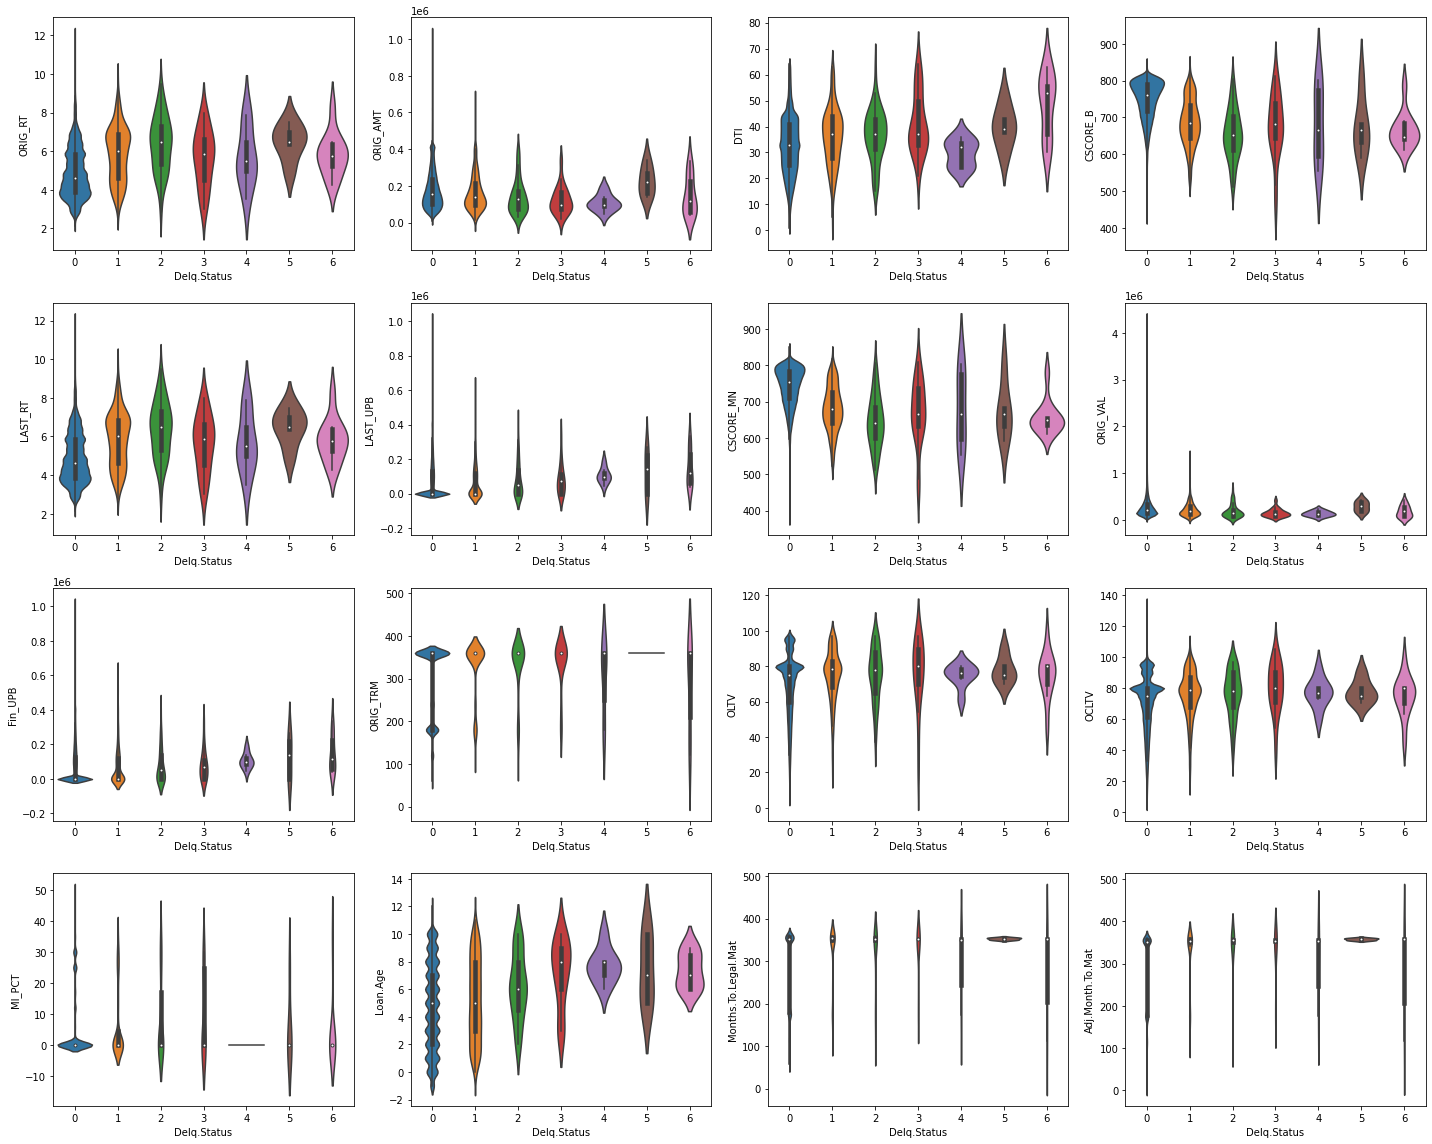

In [88]:
n_cols = ['ORIG_RT', 'ORIG_AMT', 'DTI', 'CSCORE_B', 'LAST_RT', 'LAST_UPB',
       'CSCORE_MN', 'ORIG_VAL', 'Fin_UPB', 'ORIG_TRM', 'OLTV', 'OCLTV', 'MI_PCT',
       'Loan.Age', 'Months.To.Legal.Mat', 'Adj.Month.To.Mat']
nr_rows = 4
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        sns.violinplot(y=n_cols[i], x='Delq.Status', data=df, ax=axs[r][c])
plt.tight_layout()    
plt.show()

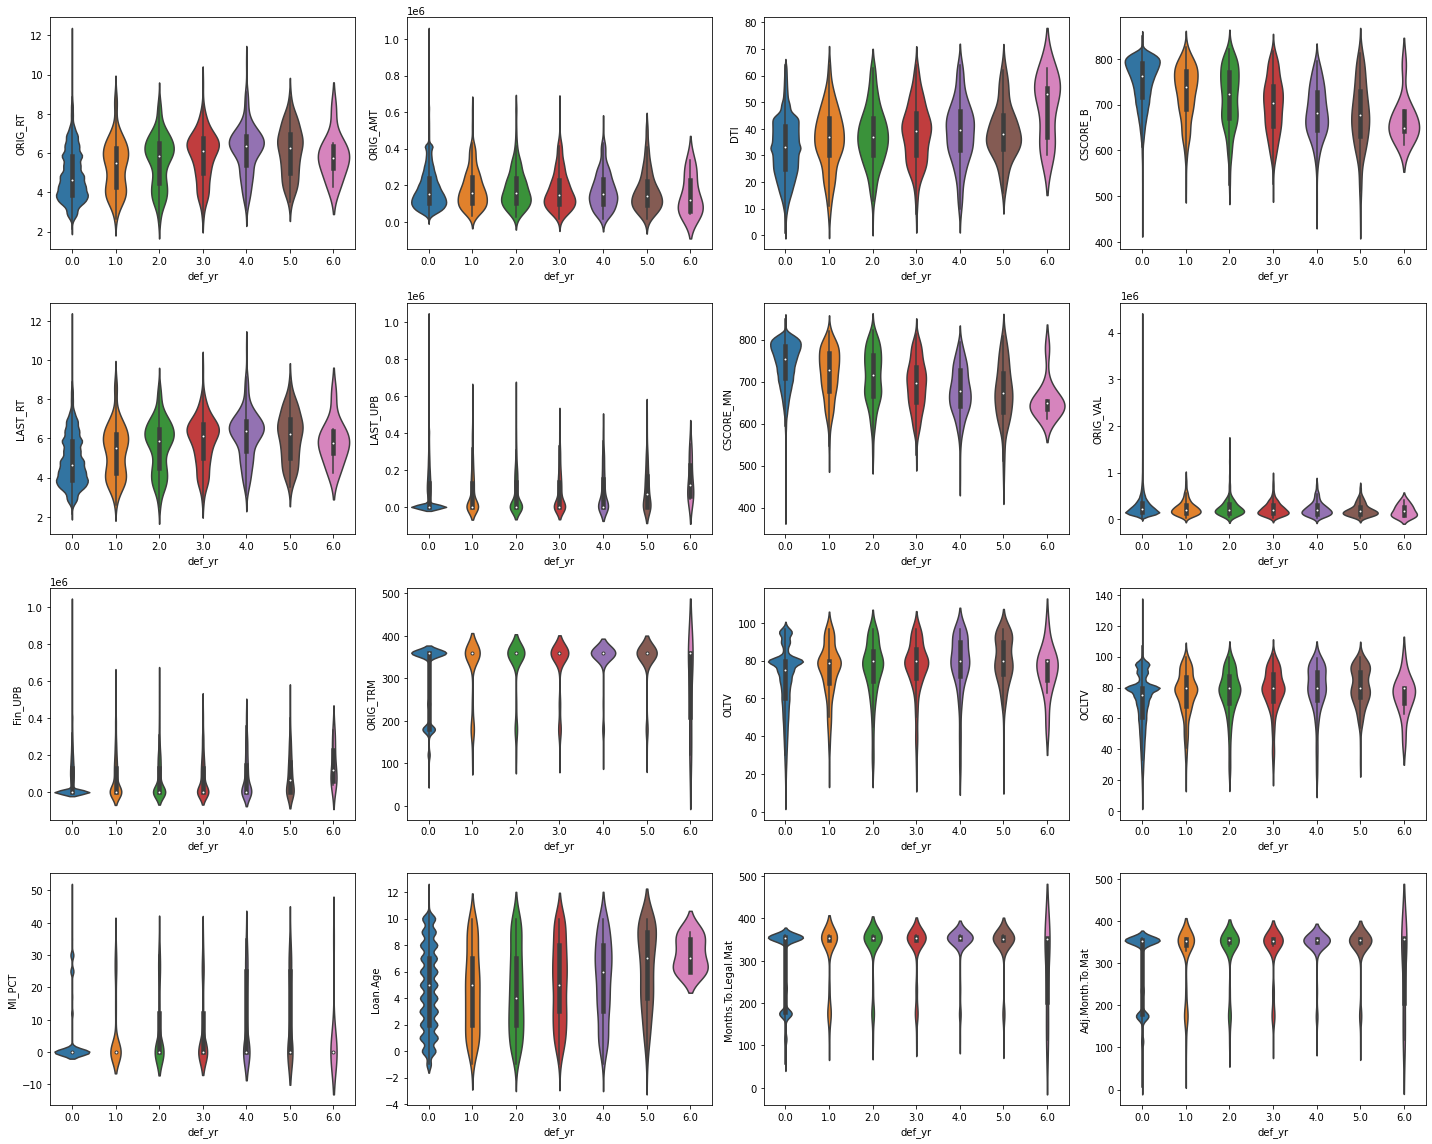

In [89]:
# years in default
df2 = df.copy()
defs = ['def.0','def.1','def.2','def.3','def.4','def.5']
df2['def_yr'] = df2[defs].apply(lambda x: x.sum(), axis=1)

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        sns.violinplot(y=n_cols[i], x='def_yr', data=df2, ax=axs[r][c])
plt.tight_layout()    
plt.show()

ORIG_CHN: Channel, R - "Retail", C - "Correspondent", B - "Broker"  
PURPOSE: Loan purpose, P - "Purchase", R - "No Cash-out Refinance", C - "Cash-out Refinance"  
PROP_TYP: Property type, SF - "Single Family", CO - "Condo", CP - "Co-Op", MH - "Manufactured Housing", PU - "Planned Urban Development"   
OCC_STAT: P - "Principal", S - "Second", I - "Investor"   

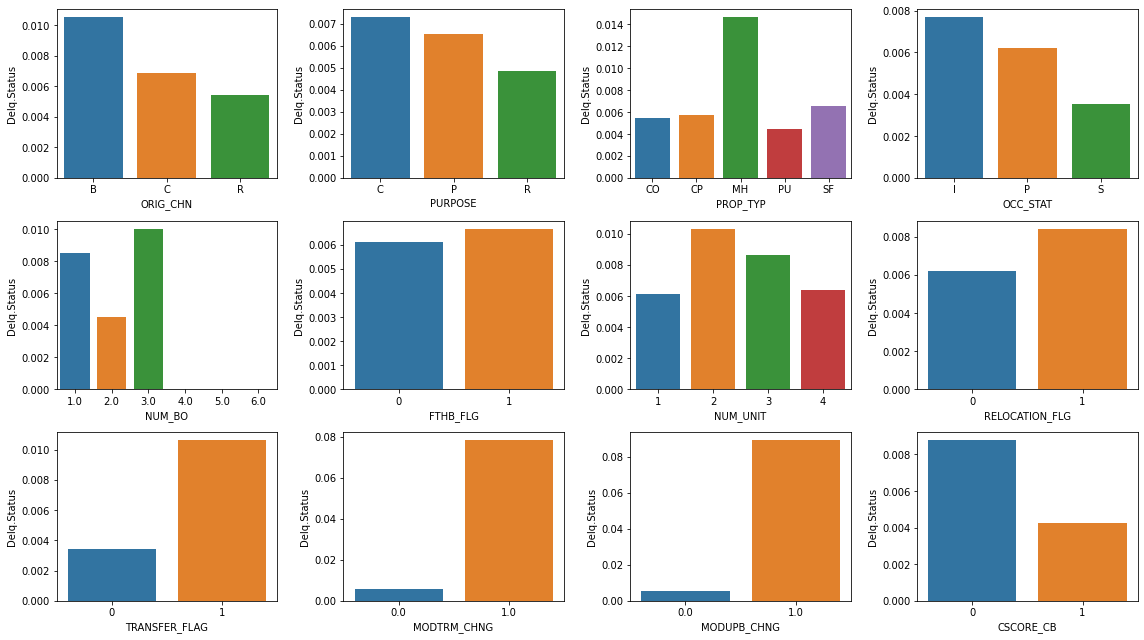

In [90]:
c_cols = ['ORIG_CHN', 'PURPOSE', 'PROP_TYP', 'OCC_STAT', 'NUM_BO', 'FTHB_FLG', 'NUM_UNIT', 
          'RELOCATION_FLG', 'TRANSFER_FLAG', 'MODTRM_CHNG', 'MODUPB_CHNG', 'CSCORE_CB']
df2[c_cols] = df2[c_cols].astype(object)
df2['Delq.Status'] = np.where(df2['Delq.Status']==0,0,1)
nr_rows = 3
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        subdf = df2.groupby(c_cols[i])['Delq.Status'].mean().to_frame().reset_index()
        sns.barplot(x=c_cols[i], y='Delq.Status', data=subdf, ax=axs[r,c])
plt.tight_layout()
plt.show()

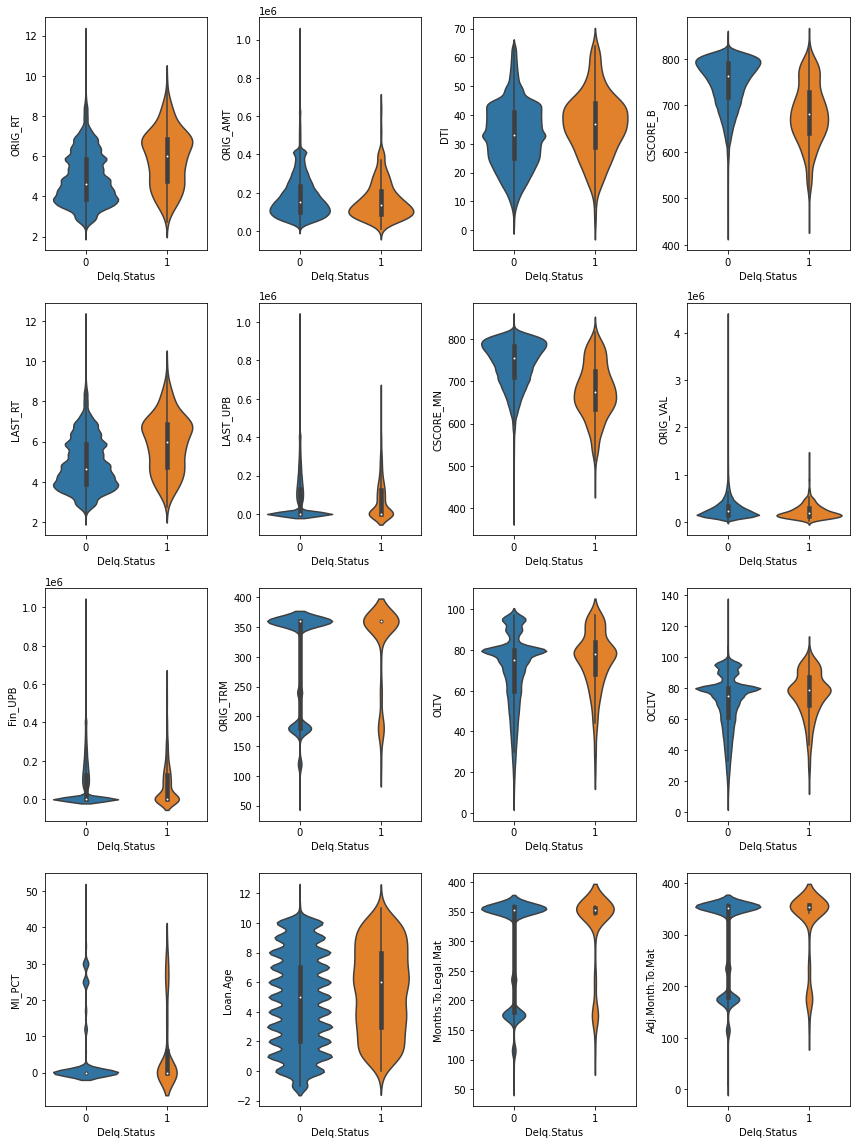

In [91]:
nr_rows = 4
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        sns.violinplot(y=n_cols[i], x='Delq.Status', data=df2, ax=axs[r][c])
plt.tight_layout()    
plt.show()

In [92]:
categorical = ['ORIG_CHN', 'PURPOSE', 'PROP_TYP', 'OCC_STAT', 'NUM_BO', 'FTHB_FLG', 'NUM_UNIT', 
          'RELOCATION_FLG', 'TRANSFER_FLAG', 'MODTRM_CHNG', 'MODUPB_CHNG', 'CSCORE_CB','def.0', 'def.1', 'def.2', 'def.3',
       'def.4', 'def.5',]

In [93]:
numerical = [x for x in df.columns.to_list() if x not in categorical]


# Feature Engineering

## Dummy variables

In [94]:
df2 = df2.drop(['def.0','def.1','def.2','def.3','def.4','def.5', 'def_yr'],axis=1)

In [95]:
df2.head()

,ORIG_CHN,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLG,PURPOSE,PROP_TYP,NUM_UNIT,OCC_STAT,STATE,MI_PCT,RELOCATION_FLG,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,TRANSFER_FLAG,CSCORE_MN,ORIG_VAL,MODTRM_CHNG,MODUPB_CHNG,Fin_UPB,VinYr,CSCORE_CB
0,R,2.875,450000.0,180,19,19,1,28.0,802.0,0,R,SF,1,P,CA,0.0,0,2.875,0.00,2,178,175,0,0,802.0,2.368421e+06,0,0,0.00,2016.0,0
1,R,5.500,30000.0,120,13,13,2,11.0,758.0,0,P,SF,1,P,MD,0.0,0,5.500,0.00,3,117,101,0,1,758.0,2.307692e+05,0,0,0.00,2003.0,1
2,C,3.875,115000.0,360,85,85,1,31.0,751.0,1,P,SF,1,P,KS,12.0,0,3.875,113208.71,9,351,351,0,0,751.0,1.352941e+05,0,0,113208.71,2016.0,0
3,R,5.750,88000.0,360,90,90,2,26.0,773.0,0,P,SF,1,I,TX,25.0,0,5.750,86979.02,8,352,352,0,1,762.0,9.777778e+04,0,0,86979.02,2004.0,1
4,R,3.500,290000.0,360,90,90,1,45.0,792.0,1,P,SF,1,P,MA,25.0,0,3.500,0.00,4,356,354,0,0,792.0,3.222222e+05,0,0,0.00,2016.0,0


In [96]:
df2 = df2.drop(columns='STATE',axis=0)

In [97]:
df2['Delq.Status'].value_counts()

0    95755
1      597
Name: Delq.Status, dtype: int64

In [98]:
df2 = pd.get_dummies(df2, drop_first=True)

In [99]:
df2

,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,DTI,CSCORE_B,MI_PCT,LAST_RT,LAST_UPB,Loan.Age,Months.To.Legal.Mat,Adj.Month.To.Mat,Delq.Status,CSCORE_MN,ORIG_VAL,Fin_UPB,VinYr,ORIG_CHN_C,ORIG_CHN_R,NUM_BO_2.0,NUM_BO_3.0,NUM_BO_4.0,NUM_BO_5.0,NUM_BO_6.0,FTHB_FLG_1,PURPOSE_P,PURPOSE_R,PROP_TYP_CP,PROP_TYP_MH,PROP_TYP_PU,PROP_TYP_SF,NUM_UNIT_2,NUM_UNIT_3,NUM_UNIT_4,OCC_STAT_P,OCC_STAT_S,RELOCATION_FLG_1,TRANSFER_FLAG_1,MODTRM_CHNG_1.0,MODUPB_CHNG_1.0,CSCORE_CB_1
0,2.875,450000.0,180,19,19,28.0,802.0,0.0,2.875,0.00,2,178,175,0,802.0,2.368421e+06,0.00,2016.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,5.500,30000.0,120,13,13,11.0,758.0,0.0,5.500,0.00,3,117,101,0,758.0,2.307692e+05,0.00,2003.0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,3.875,115000.0,360,85,85,31.0,751.0,12.0,3.875,113208.71,9,351,351,0,751.0,1.352941e+05,113208.71,2016.0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,5.750,88000.0,360,90,90,26.0,773.0,25.0,5.750,86979.02,8,352,352,0,762.0,9.777778e+04,86979.02,2004.0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,3.500,290000.0,360,90,90,45.0,792.0,25.0,3.500,0.00,4,356,354,0,792.0,3.222222e+05,0.00,2016.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99578,4.500,73000.0,360,42,63,5.0,795.0,0.0,4.500,72220.79,7,353,352,0,795.0,1.738095e+05,72220.79,2009.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
99579,5.000,84000.0,360,80,80,29.0,709.0,0.0,5.000,0.00,2,358,358,0,705.0,1.050000e+05,0.00,2011.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
99580,6.750,109000.0,180,30,30,36.0,674.0,0.0,6.750,105008.57,10,170,170,0,674.0,3.633333e+05,105008.57,2002.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
99581,3.625,239000.0,360,71,71,24.0,709.0,0.0,3.625,230937.71,7,353,339,0,709.0,3.366197e+05,230937.71,2013.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [100]:
df2.to_csv('Data_1.csv')

## Sample Imbalance Problem

In [101]:
df2['Delq.Status'].value_counts()

0    95755
1      597
Name: Delq.Status, dtype: int64

In [102]:
# df2.to_excel('/content/drive/MyDrive/Advanced AI/data.xlsx')

In [103]:
yr = df2['VinYr'].astype(int).value_counts().to_frame().reset_index()
yr.columns = ['Year','Count']
yr = yr.sort_values('Year').reset_index(drop=True)
yr

,Year,Count
0,2000,2010
1,2001,6673
2,2002,7438
3,2003,10828
4,2004,3260
5,2005,2424
6,2006,1746
7,2007,1714
8,2008,2166
9,2009,5795


In [104]:
yr[-4:]['Count'].sum() / df2.shape[0] # 2013-2016 as test set

0.3522085685818665

In [105]:
train = df2[df2['VinYr']<=2012]
test = df2[df2['VinYr']>=2013]

In [106]:
from imblearn.over_sampling import SMOTE

X_train = train.drop('Delq.Status',axis=1)
y_train = train['Delq.Status']
X_test = test.drop('Delq.Status',axis=1)
y_test = test['Delq.Status']

smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_smo, columns=X_train.columns)
y_train = pd.DataFrame(y_smo, columns=['Delq.Status'])

X_smo, y_smo = smo.fit_sample(X_test, y_test)
X_test = pd.DataFrame(X_smo, columns=X_train.columns)
y_test = pd.DataFrame(y_smo, columns=['Delq.Status'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [107]:
pos = range(16,X_train.shape[1])
pos2 = [] 
col = X_train.columns[pos]
X_train[col] = X_train[col].round()

pos = range(16,X_test.shape[1])
pos2 = [] 
col = X_test.columns[pos]
X_test[col] = X_test[col].round()

In [108]:
col

Index(['VinYr', 'ORIG_CHN_C', 'ORIG_CHN_R', 'NUM_BO_2.0', 'NUM_BO_3.0',
       'NUM_BO_4.0', 'NUM_BO_5.0', 'NUM_BO_6.0', 'FTHB_FLG_1', 'PURPOSE_P',
       'PURPOSE_R', 'PROP_TYP_CP', 'PROP_TYP_MH', 'PROP_TYP_PU', 'PROP_TYP_SF',
       'NUM_UNIT_2', 'NUM_UNIT_3', 'NUM_UNIT_4', 'OCC_STAT_P', 'OCC_STAT_S',
       'RELOCATION_FLG_1', 'TRANSFER_FLAG_1', 'MODTRM_CHNG_1.0',
       'MODUPB_CHNG_1.0', 'CSCORE_CB_1'],
      dtype='object')

In [109]:
y_train.value_counts()

Delq.Status
1              61964
0              61964
dtype: int64

In [110]:
y_test.value_counts()

Delq.Status
1              33791
0              33791
dtype: int64

In [111]:
X_train['VinYr'].max()

2012.0

In [112]:
X_test['VinYr'].min()

2013.0

# Modeling

## Baseline Models

In [ ]:
# Logistic Regression Classifier  
def logistic_regression_classifier(X_train, y_train):  
    from sklearn.linear_model import LogisticRegression  
    model = LogisticRegression(penalty='l2')  
    model.fit(X_train, y_train)  
    return model 

# Decision Tree Classifier  
def decision_tree_classifier(X_train, y_train):  
    from sklearn import tree  
    model = tree.DecisionTreeClassifier()  
    model.fit(X_train, y_train)  
    return model

# KNN Classifier  
def knn_classifier(X_train, y_train):  
    from sklearn.neighbors import KNeighborsClassifier  
    model = KNeighborsClassifier()  
    model.fit(X_train, y_train)  
    return model 

# Random Forest Classifier  
def random_forest_classifier(X_train, y_train):  
    from sklearn.ensemble import RandomForestClassifier  
    model = RandomForestClassifier(n_estimators=8)  
    model.fit(X_train, y_train)  
    return model 

test_classifiers = ['LR', 'DT', 'KNN', 'RF']  
classifiers = {'LR':logistic_regression_classifier,
               'DT':decision_tree_classifier, 
               'KNN':knn_classifier, 
               'RF':random_forest_classifier,
               } 

import time  
from sklearn import metrics  
y_train = np.ravel(y_train)

def train_models(X_train,y_train,X_test,y_test,test_classifiers):
  trained_models=[]
  train_preds=[]
  test_preds=[]

  for classifier in test_classifiers:  
    print('******************* %s ********************' % classifier)  
    start_time = time.time()  
    model = classifiers[classifier](X_train, y_train)  
    print('training took %fs' % (time.time() - start_time)) 

    predict = model.predict(X_train) 
    train_preds.append(predict)

    predict = model.predict(X_test) 
    precision = metrics.precision_score(y_test, predict)  
    recall = metrics.recall_score(y_test, predict)  
    print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))  
    accuracy = metrics.accuracy_score(y_test, predict)  
    print('accuracy: %.2f%%' % (100 * accuracy)) 
    trained_models.append(model)
    test_preds.append(predict)

  return trained_models, train_preds, test_preds

trained_models, train_preds, test_preds = train_models(X_train,y_train,X_test,y_test,test_classifiers)

******************* LR ********************
training took 2.055774s
precision: 74.25%, recall: 61.74%
accuracy: 70.16%
******************* DT ********************
training took 2.516786s
precision: 98.87%, recall: 37.52%
accuracy: 68.54%
******************* KNN ********************
training took 2.810216s
precision: 69.66%, recall: 29.36%
accuracy: 58.29%
******************* RF ********************
training took 2.524506s
precision: 99.80%, recall: 5.97%
accuracy: 52.98%


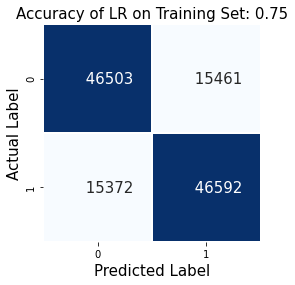

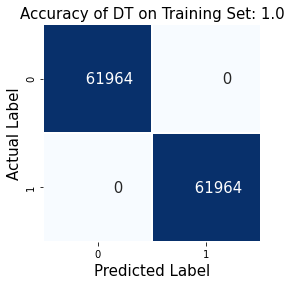

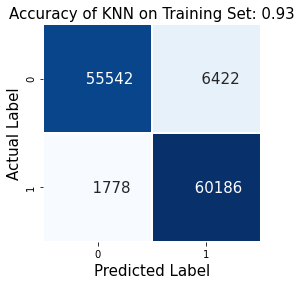

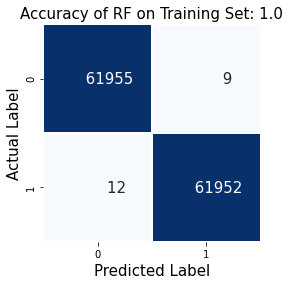

In [ ]:
def cm_acc(act, pred, subset):
  for i in range(0,len(test_classifiers)):
    cm = metrics.confusion_matrix(act, pred[i])
    acc = metrics.accuracy_score(act, pred[i]).round(2)
    sns.heatmap(cm, annot=True, fmt="10d", linewidths=.5, square = True, 
                cmap = 'Blues', cbar = False, annot_kws={'fontsize':15})
    plt.ylabel('Actual Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=15)
    plt.title('%s' % test_classifiers[i])
    all_sample_title = 'Accuracy of {0} on '.format(test_classifiers[i]) + subset +' Set: {0}'.format(acc)
    plt.title(all_sample_title, size = 15) 
    plt.show()
cm_acc(y_train, train_preds, 'Training')

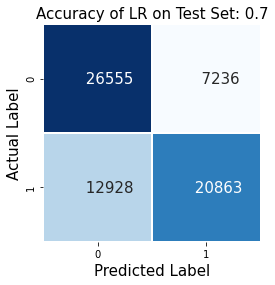

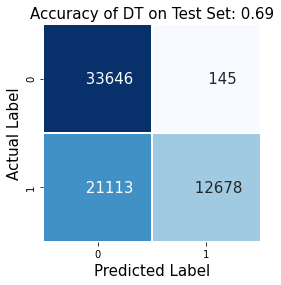

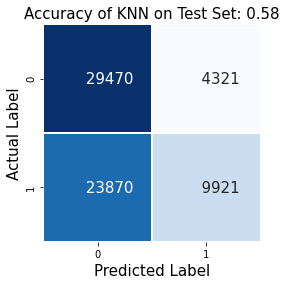

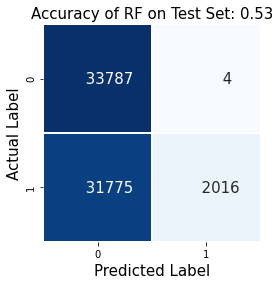

In [ ]:
cm_acc(y_test, test_preds, 'Test')

In [ ]:
d = {
    'Feature': X_train.columns,
    'Importance': trained_models[1].feature_importances_
}
dt_imp = pd.DataFrame(d)
dt_imp = dt_imp.sort_values('Importance', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

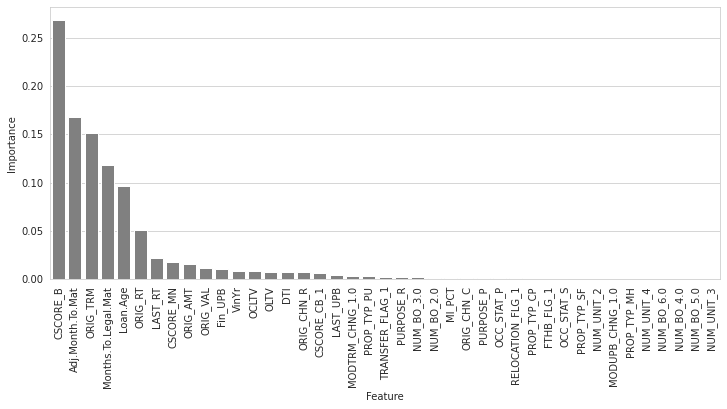

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.barplot(data=dt_imp, x='Feature', y='Importance', color='gray')
plt.xticks(rotation=90)

## Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV  

def logistic_regression_classifier(X_train, y_train):  
    from sklearn.linear_model import LogisticRegression  
    model = LogisticRegression(penalty='l2')
    param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
    grid_search = GridSearchCV(model, param_grid, n_jobs=1, verbose=0)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    return grid_search 

def decision_tree_classifier(X_train, y_train):  
    from sklearn import tree  
    model = tree.DecisionTreeClassifier()  
    param_grid = {'max_depth':[30,50,60,100],
                  'min_samples_leaf':[2,3,5,10],
                  'min_impurity_decrease':[0.1,0.2,0.5]}
    grid_search = GridSearchCV(model, param_grid, n_jobs=1, verbose=0)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)    
    return grid_search

test_classifiers = ['LR', 'DT']  
classifiers = {'LR':logistic_regression_classifier, 'DT':decision_tree_classifier} 

trained_models, train_preds, test_preds = train_models(X_train,y_train,X_test,y_test,test_classifiers)

******************* LR ********************
{'C': 0.001}
training took 52.011597s
precision: 74.25%, recall: 61.74%
accuracy: 70.16%
******************* DT ********************
{'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}
training took 68.690196s
precision: 74.30%, recall: 64.37%
accuracy: 71.05%


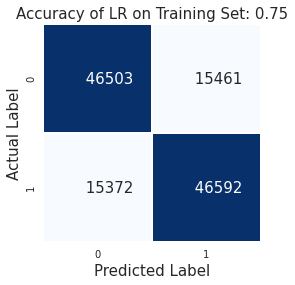

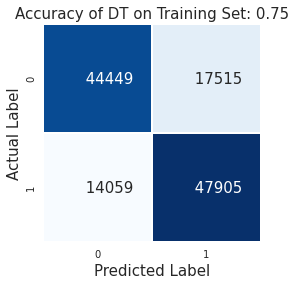

In [ ]:
cm_acc(y_train, train_preds, 'Training')

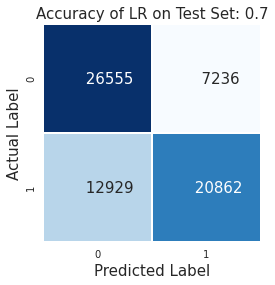

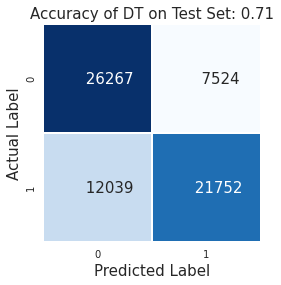

In [ ]:
cm_acc(y_test, test_preds, 'Test')

## Dimensionality Reduction

In [ ]:
X_train.shape

(123928, 41)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
selector = SelectFromModel(clf, prefit=True)
X_new = selector.transform(X_train)
X_new.shape 

(123928, 15)

In [ ]:
imp_list = X_train.columns[selector.get_support()]
imp_list

Index(['ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'OLTV', 'OCLTV', 'DTI', 'CSCORE_B',
       'LAST_RT', 'Loan.Age', 'Months.To.Legal.Mat', 'Adj.Month.To.Mat',
       'CSCORE_MN', 'ORIG_VAL', 'VinYr', 'TRANSFER_FLAG_1'],
      dtype='object')

In [ ]:
X_train2 = X_train[imp_list]
X_test2 = X_test[imp_list]

In [ ]:
preds = []
for i in range(0,2):
  print('******************* %s ********************' % test_classifiers[i])  
  model = trained_models[i].best_estimator_
  model.fit(X_train2, y_train)
  predict = model.predict(X_test2) 
  precision = metrics.precision_score(y_test, predict)  
  recall = metrics.recall_score(y_test, predict)  
  print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))  
  accuracy = metrics.accuracy_score(y_test, predict)  
  print('accuracy: %.2f%%' % (100 * accuracy)) 
  preds.append(predict)

******************* LR ********************
precision: 74.67%, recall: 63.18%
accuracy: 70.88%
******************* DT ********************
precision: 74.30%, recall: 64.37%
accuracy: 71.05%


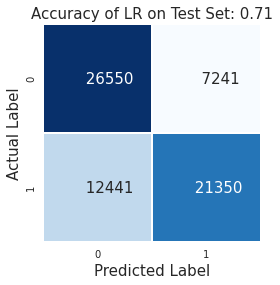

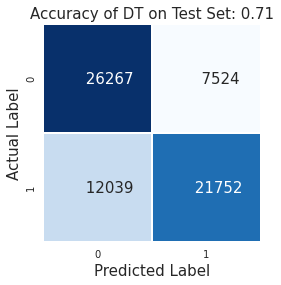

In [ ]:
cm_acc(y_test, preds, 'Test')

Recall of logistic regression was slightly improved.